In [0]:
import pandas as pd

input_file = "hw4_data.csv"

df = pd.read_table(input_file, sep=',', error_bad_lines=False, encoding="ISO-8859-1")
df.head()

,subject_id,age,sex,race,major,C_t1,C_t2
0,1,18,0,4,0,4.2,4.3
1,2,18,0,4,0,4.2,4.0
2,3,19,0,4,0,4.9,4.9
3,4,18,0,4,0,3.6,3.4
4,5,20,1,4,0,3.7,3.6


In [0]:
# use t-test to see if college students are more C_t1 than average. Assume average person is 3s

In [0]:
df.C_t1.describe()

count    75.000000
mean      3.593333
std       0.700643
min       1.800000
25%       3.100000
50%       3.700000
75%       4.150000
max       4.900000
Name: C_t1, dtype: float64

In [0]:
from scipy import stats


stats.ttest_1samp(df.C_t1, 3)
# So we can reject the NULL, there is a difference

Ttest_1sampResult(statistic=7.333857458594125, pvalue=2.333359682804876e-10)

In [0]:
import numpy as np

cohensD= (np.mean(df.C_t1)-3)/(np.std(df.C_t1))
cohensD

# We are seeing a large effect size here

0.8525436124453171

In [0]:
df.C_t1.mean()


3.593333333333335

In [0]:
df.C_t1.std()

0.7006432051343258

In [0]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


mean_confidence_interval(df.C_t1, confidence=0.95)

(3.5933333333333333, 3.432129972034879, 3.7545366946317875)

In [0]:
from scipy.stats import sem

sample_mean = np.mean(df.C_t1)
sample_95ci = 1.96 * sem(df.C_t1)
sample_min = sample_mean - sample_95ci
sample_max = sample_mean + sample_95ci

print(sample_mean, sample_95ci, sample_min, sample_max)

3.593333333333335 0.1585704848913526 3.4347628484419825 3.7519038182246875


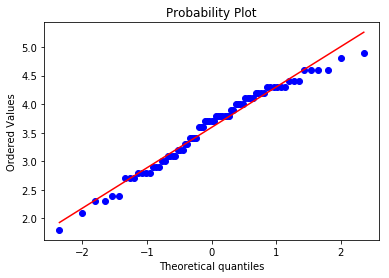

In [0]:
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline

  
stats.probplot(df.C_t1, dist="norm", plot=pylab)
pylab.show()

In [0]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(df.C_t1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.973, p=0.107
Sample looks Gaussian (fail to reject H0)


In [0]:
# 2


In [0]:
# women
is_women =  df['sex']==0
women=df[is_women]
women.head()


,subject_id,age,sex,race,major,C_t1,C_t2
0,1,18,0,4,0,4.2,4.3
1,2,18,0,4,0,4.2,4.0
2,3,19,0,4,0,4.9,4.9
3,4,18,0,4,0,3.6,3.4
6,7,19,0,0,0,4.4,4.1


In [0]:
women.C_t2.describe()

count    52.000000
mean      3.642308
std       0.680065
min       1.600000
25%       3.300000
50%       3.700000
75%       4.100000
max       4.900000
Name: C_t2, dtype: float64

In [0]:
# men
is_men =  df['sex']==1
men=df[is_men]
men.head()

,subject_id,age,sex,race,major,C_t1,C_t2
4,5,20,1,4,0,3.7,3.6
5,6,18,1,4,2,2.9,3.0
12,13,21,1,4,2,2.4,1.7
18,19,18,1,0,2,3.0,2.8
26,27,20,1,4,1,4.0,4.6


In [0]:
men.C_t2.describe()

count    23.000000
mean      3.256522
std       0.731640
min       1.700000
25%       2.850000
50%       3.100000
75%       3.750000
max       4.600000
Name: C_t2, dtype: float64

In [0]:

from scipy import stats
t, p = stats.ttest_ind(women.C_t2, men.C_t2, equal_var=False)

In [0]:
t# t-stat

2.1509777710235727

In [0]:
p # p-value

0.03764601982548069

In [0]:
scipy.stats.levene(men.C_t2, women.C_t2)
#Here, we can assume that the variances of these two variables between the two groups are approximately equal.

LeveneResult(statistic=0.3542555237709392, pvalue=0.5535546566927927)

In [0]:

# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

d= cohend(women.C_t2, men.C_t2)
print('Cohens d: %.3f' % d)

Cohens d: 0.554


In [0]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


mean_confidence_interval(women.C_t2, confidence=0.95)

(3.642307692307693, 3.452976329428498, 3.8316390551868884)

In [0]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


mean_confidence_interval(men.C_t2, confidence=0.95)

(3.256521739130435, 2.9401370689910897, 3.57290640926978)

In [0]:
test= mean(women.C_t2) - mean(men.C_t2)
test

0.3857859531772583

In [0]:
import numpy as np, statsmodels.stats.api as sms

#X1, X2 = np.arange(10,21), np.arange(20,26.5,.5)

cm = sms.CompareMeans(sms.DescrStatsW(women.C_t2), sms.DescrStatsW(men.C_t2))
print(cm.tconfint_diff(alpha=.05, usevar='unequal'))

# .05 alpha. 

(0.023166102551457568, 0.7484058038030572)


In [0]:
import numpy as np, statsmodels.stats.api as sms

#X1, X2 = np.arange(10,21), np.arange(20,26.5,.5)

cm = sms.CompareMeans(sms.DescrStatsW(women.C_t2), sms.DescrStatsW(men.C_t2))
print(cm.tconfint_diff(alpha=.01, usevar='unequal'))

# .05 alpha. 

(-0.09955194698251263, 0.8711238533370274)


In [0]:
df[['C_t1', 'C_t2']].describe()

,C_t1,C_t2
count,75.000000,75.000000
mean,3.593333,3.524000
std,0.700643,0.714113
min,1.800000,1.600000
25%,3.100000,3.100000
50%,3.700000,3.600000
75%,4.150000,4.050000
max,4.900000,4.900000


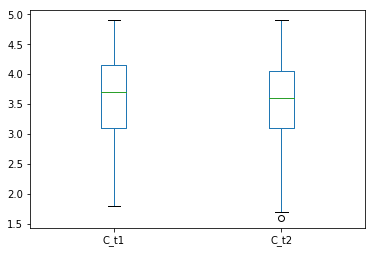

In [0]:
from scipy import stats
import matplotlib.pyplot as plt

df[['C_t1', 'C_t2']].plot(kind='box')


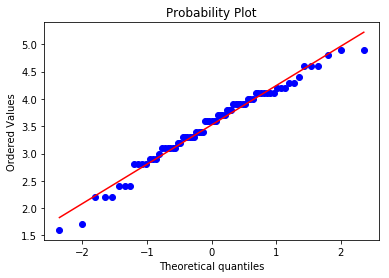

In [0]:
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline

  
stats.probplot(df.C_t2, dist="norm", plot=pylab)
pylab.show()

In [0]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(df.C_t2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.977, p=0.186
Sample looks Gaussian (fail to reject H0)


In [0]:
stats.ttest_rel(df['C_t1'], df['C_t2'])


Ttest_relResult(statistic=1.729494273618122, pvalue=0.08789012581376293)

In [0]:
(df['C_t1'] - df['C_t2']).mean()

0.06933333333333333

In [0]:
(df['C_t1'] - df['C_t2']).std()

0.347179108434441